In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# 1
traffic = np.zeros(shape=46)
traffic[0:10] = 5
traffic[15:20] = 8
traffic[25:46] = 2.5

Text(0, 0.5, 'Bitrate (Mbit/s)')

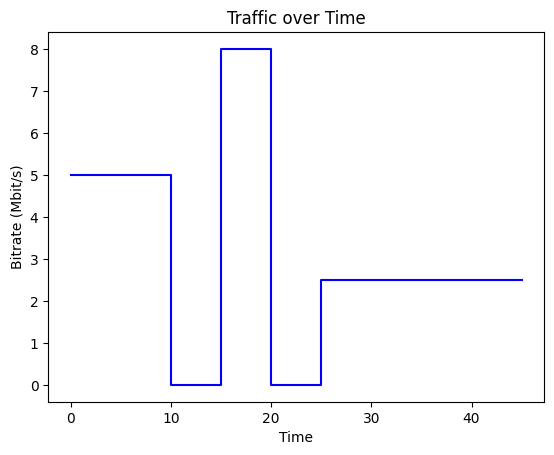

In [9]:
plt.step(range(len(traffic)), traffic, where='post', color='blue')
plt.title('Traffic over Time')
plt.xlabel('Time')
plt.ylabel('Bitrate (Mbit/s)')

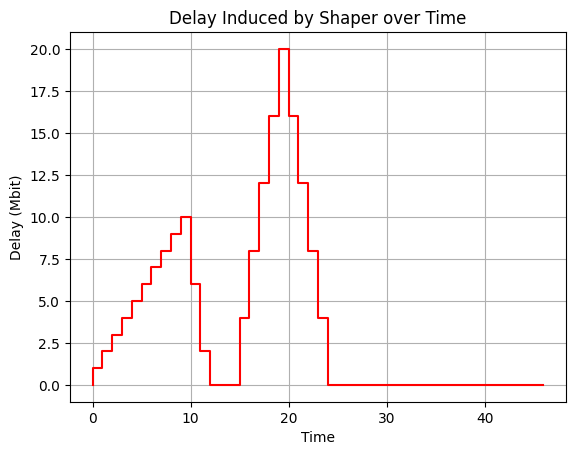

In [59]:
# task 2
def get_shaped_traffic(traffic, shaping_rate):
    shaped_traffic = np.zeros(len(traffic) + 1)
    delay = np.zeros(len(traffic) + 1)
    total_delay = 0
    for i in range(len(traffic)):
        total_traffic = traffic[i] + total_delay
        if total_traffic > shaping_rate:
            shaped_traffic[i+1] = shaping_rate
            total_delay += traffic[i] - shaping_rate
        else:
            shaped_traffic[i+1] = total_traffic
            total_delay = 0
        delay[i+1] = total_delay
    return shaped_traffic, delay

def plot_delay(delay, name):
    plt.step(range(len(delay)), delay, color='red')
    plt.xlabel('Time')
    plt.ylabel('Delay (Mbit)')
    plt.title('Delay Induced by Shaper over Time')
    plt.grid(True)
    plt.savefig(name)
    plt.show()

shaping_rate = 4  # Peak rate in Mbit/s
shaped_traffic, delay = get_shaped_traffic(traffic, shaping_rate)
plot_delay(delay, "2.delay.png")

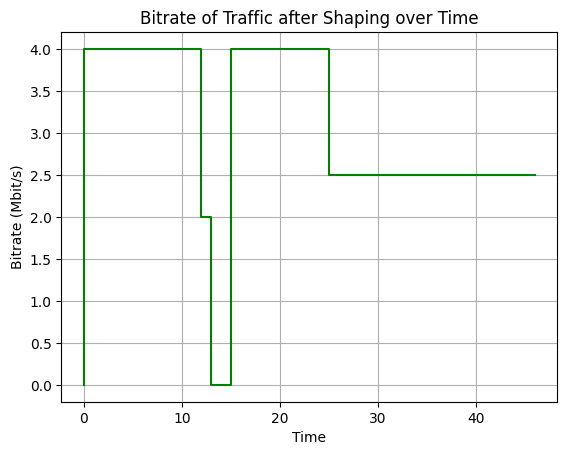

In [60]:
# task 3
import matplotlib.pyplot as plt
import numpy as np

def plot_shaped_traffic(traffic, shaped_traffic, name):
    plt.step(range(len(traffic) + 1), shaped_traffic, color='green')
    plt.xlabel('Time')
    plt.ylabel('Bitrate (Mbit/s)')
    plt.title('Bitrate of Traffic after Shaping over Time')
    plt.grid(True)
    plt.savefig(name)
    plt.show()

plot_shaped_traffic(traffic, shaped_traffic, "3.bitrate-after-shaving.png")


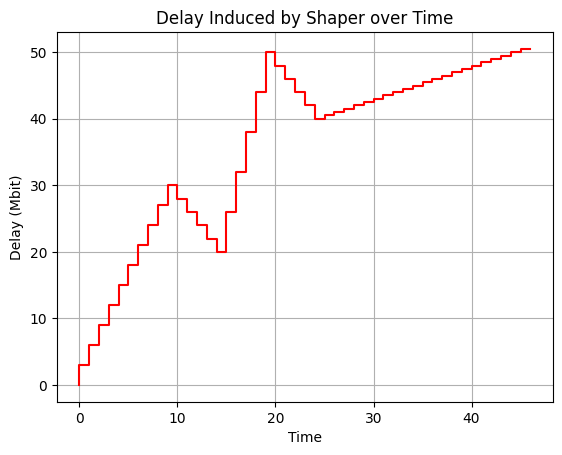

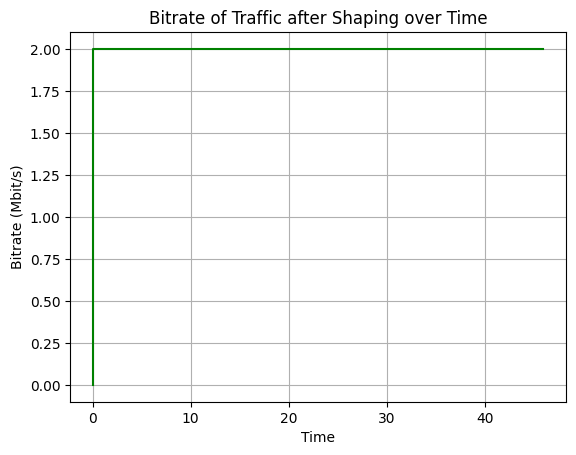

In [61]:
# task 4
shaping_rate = 2
shaped_traffic, delay = get_shaped_traffic(traffic, shaping_rate)
plot_delay(delay, "4.delay.png")
plot_shaped_traffic(traffic, shaped_traffic, "4.bitrate-after-shaving.png")

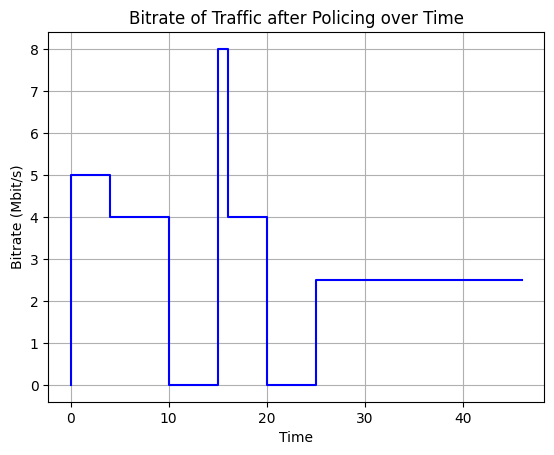

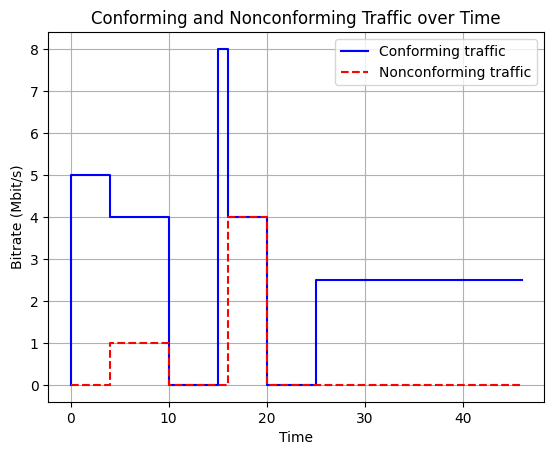

In [62]:

# task 5 and 6
def apply_policing(traffic, leak_rate, burst_tolerance):
    conforming_traffic = np.zeros(len(traffic) + 1)
    nonconforming_traffic = np.zeros(len(traffic) + 1)
    bucket_level = burst_tolerance  # bucket starts full

    for i in range(len(traffic)):
        bucket_level = min(bucket_level + leak_rate, burst_tolerance)
        bucket_level_used = min(bucket_level, traffic[i])
        bucket_level -= bucket_level_used
        conforming_traffic[i + 1] += bucket_level_used
        nonconforming_traffic[i + 1] += traffic[i] - conforming_traffic[i + 1]

    return (conforming_traffic, nonconforming_traffic)


# Plot for task 5
def plot_policed_traffic(policed_traffic, file='a2q5.png'):
    plt.step(range(len(policed_traffic)), policed_traffic, color='blue')
    plt.xlabel('Time')
    plt.ylabel('Bitrate (Mbit/s)')
    plt.title('Bitrate of Traffic after Policing over Time')
    plt.grid(True)
    plt.savefig(file)
    plt.show()


# Plot for task 6
def plot_conforming_v_nonconforming_traffic(conforming_traffic, nonconforming_traffic, file='a2q6.png'):
    plt.step(range(len(conforming_traffic)), conforming_traffic, color='blue', label='Conforming traffic')
    plt.step(range(len(nonconforming_traffic)), nonconforming_traffic, '--', color='red', label='Nonconforming traffic')
    plt.xlabel('Time')
    plt.ylabel('Bitrate (Mbit/s)')
    plt.title('Conforming and Nonconforming Traffic over Time')
    plt.legend()
    plt.grid(True)
    plt.savefig(file)
    plt.show()


leak_rate = 4
burst_tolerance = 1 * 8  # Burst tolerance in Mbit (1 Mbyte = 8 Mbit)

conforming_traffic, nonconforming_traffic = apply_policing(traffic, leak_rate, burst_tolerance)
plot_policed_traffic(conforming_traffic)
plot_conforming_v_nonconforming_traffic(conforming_traffic, nonconforming_traffic)


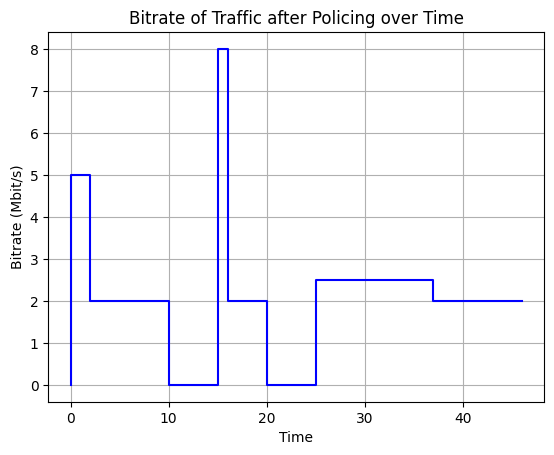

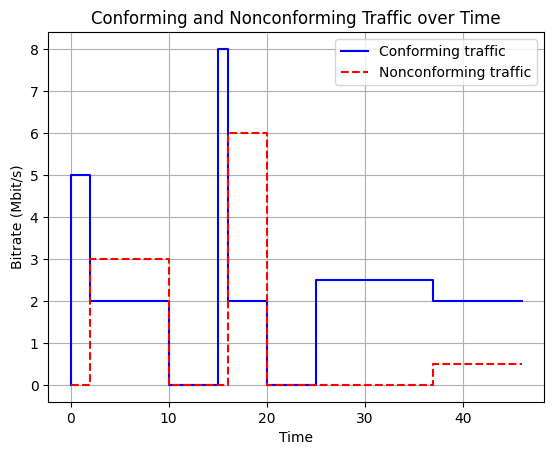

In [63]:
# Task 7
leak_rate = 2
conforming_traffic, nonconforming_traffic = apply_policing(traffic, leak_rate, burst_tolerance)
plot_policed_traffic(conforming_traffic, file='a2q7a.png')
plot_conforming_v_nonconforming_traffic(conforming_traffic, nonconforming_traffic, file='a2q7b.png')

In [66]:
import math
def ceildiv(a, b):
    return -(-a // b)


# Define formula for transfer time
def transfer_time(fs, cw_start, rtt):
    S = ceildiv(fs, 1_460)
    R = math.floor(math.log2(ceildiv(S, cw_start)) + 1)
    print(f"S={S} R={R}")

    return \
        rtt + 0.05 + \
        R * rtt + \
        (fs * 8) / 100_000_000


# Calculate transfer times for assignment 8

for fs in [10_000, 20_000, 50_000]:
    print(f"fs={fs} t_transfer = {transfer_time(fs, 1, 0.05)} seconds")

S=7 R=3
fs=10000 t_transfer = 0.2508 seconds
S=14 R=4
fs=20000 t_transfer = 0.30160000000000003 seconds
S=35 R=6
fs=50000 t_transfer = 0.404 seconds


In [69]:
# task 9
for fs in [10_000, 20_000, 50_000]:
    print(f"fs={fs} t_transfer = {transfer_time(fs, 5, 0.05)} seconds")

S=7 R=2
fs=10000 t_transfer = 0.2008 seconds
S=7 R=2
fs=10000 transfer_time(fs, 5, 0.05)=0.2008 seconds
S=14 R=2
fs=20000 t_transfer = 0.2016 seconds
S=14 R=2
fs=20000 transfer_time(fs, 5, 0.05)=0.2016 seconds
S=35 R=3
fs=50000 t_transfer = 0.254 seconds
S=35 R=3
fs=50000 transfer_time(fs, 5, 0.05)=0.254 seconds


In [70]:
#task 10
for fs in [10_000, 20_000, 50_000]:
    print(f"fs={fs} t_transfer = {transfer_time(fs, 1, 0.1)} seconds")

S=7 R=3
fs=10000 t_transfer = 0.4508000000000001 seconds
S=14 R=4
fs=20000 t_transfer = 0.5516000000000001 seconds
S=35 R=6
fs=50000 t_transfer = 0.7540000000000001 seconds
